In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import cmaps
import numpy as np
import cmocean

%matplotlib inline
plt.rcParams["font.size"] = 14

In [13]:
import datetime
root_dir = '/home/gkara/Documents/for-tide_paper/'

#load Obs data (Station 62103 - Channel Lightship - 49.9 ◦ N, 2.9 ◦ W)
obs = xr.open_dataset(root_dir + 'obs_insitu/NO_TS_MO_62103.nc')
obs = obs.sel(TIME=slice(datetime.date(2011, 7, 6), datetime.date(2012, 6, 30)))

#load TON/TOFF gridT data at the English Channel station
T_ton = xr.open_dataset(root_dir + 'ref/EC_loc_1h_gridT_20110706-20120629.nc')
T_toff = xr.open_dataset(root_dir + 'exp1/EC_loc_1h_gridT_20110706-20120629.nc')

In [14]:
# select nearest time frame of model relative to observations
T_ton_nearobs = T_ton.sel(time_counter=obs.TIME.values, method="nearest")
T_toff_nearobs = T_toff.sel(time_counter=obs.TIME.values, method="nearest")

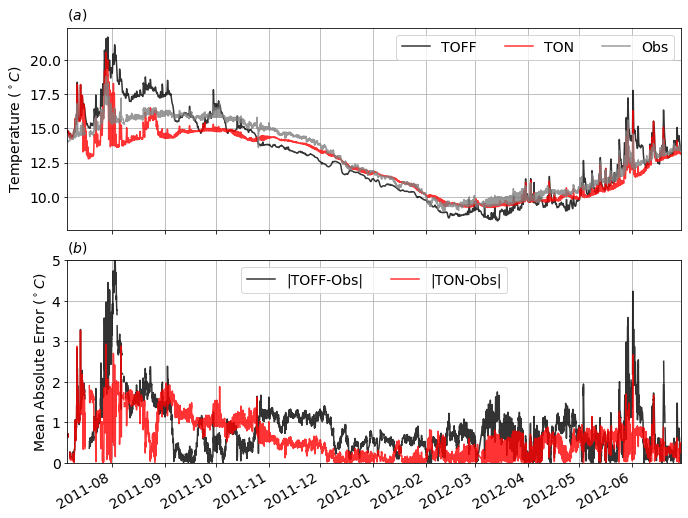

In [15]:
import datetime

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11,8))
fig.subplots_adjust(hspace=.15)

# Plot temperature data
T_toff.sotemper.plot(ax=axes[0], label='TOFF', color='k', alpha=0.8, linestyle='-')
T_ton.sotemper.plot(ax=axes[0], label='TON', color='r', alpha=0.8, linestyle='-')
obs.TEMP[:,1].plot(ax=axes[0], label='Obs', color='gray', alpha=0.8, linestyle='-')

# Plot Mean Absolute Error (Model - Obs)
np.abs(T_toff_nearobs.sotemper[:,0,0] - obs.TEMP.values[:,1]).plot(ax=axes[1], color='k', alpha=0.8, label='|TOFF-Obs|')
np.abs(T_ton_nearobs.sotemper[:,0,0] - obs.TEMP.values[:,1]).plot(ax=axes[1], color='r', alpha=0.8, label='|TON-Obs|')

# costumize x-y axis labels/limits
axes[0].set_xlabel('')
axes[0].set_ylabel('Temperature ($^\circ C$)')
axes[0].set_xticklabels([])
axes[1].set_ylabel('Mean Absolute Error ($^\circ C$)')
axes[1].set_xlabel('')
axes[1].set_ylim(0,5)

# add anotation and legend
idx = ['$(a)$', '$(b)$']
for i, ax in enumerate(axes.flat):
    ax.set_xlim([datetime.date(2011, 7, 6), datetime.date(2012, 6, 30)])
    ax.grid()
    ax.set_title('')
    ax.legend( ncol=3)
    ax.annotate(idx[i], xy=(0, 1), xycoords='axes fraction', fontsize=14,
        xytext=(20, 5), textcoords='offset points',
        ha='right', va='bottom')
#save figure
fig.savefig('../_plots/figureS1.png',dpi=300,bbox_inches='tight')

In [17]:
print('TON-MAError: {}'.format(np.abs(T_ton_nearobs.sotemper[:,0,0] - obs.TEMP.values[:,1]).mean().values))
print('TOFF-MAError: {}'.format(np.abs(T_toff_nearobs.sotemper[:,0,0] - obs.TEMP.values[:,1]).mean().values))

TON-MAError: 0.587446158206761
TOFF-MAError: 0.8461722949442709
